<a href="https://colab.research.google.com/github/aryan-at-ul/customer_segmentation/blob/main/BIRCH_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data_path = "/content/drive/MyDrive/customer_segmentation/segmentation data.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os 
import pandas as pd
import scipy 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import metrics

import pickle
#sns skin on matplotlib
sns.set()

In [ ]:
df_segmentation = pd.read_csv(data_path,index_col = 0)
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [ ]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
df_segmentation.corr() 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


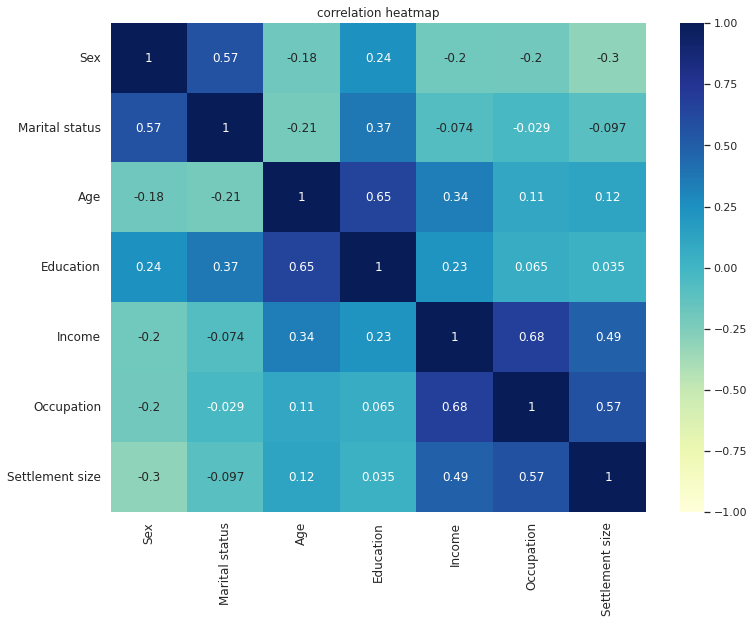

In [ ]:
plt.figure(figsize= (12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
                cmap = 'YlGnBu',#autum, viridis , RdBu, YlGnBu
                vmin = -1,
                vmax = 1) 

s.set_yticklabels(s.get_yticklabels(),rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation = 90, fontsize = 12)

plt.title("correlation heatmap")
plt.show()

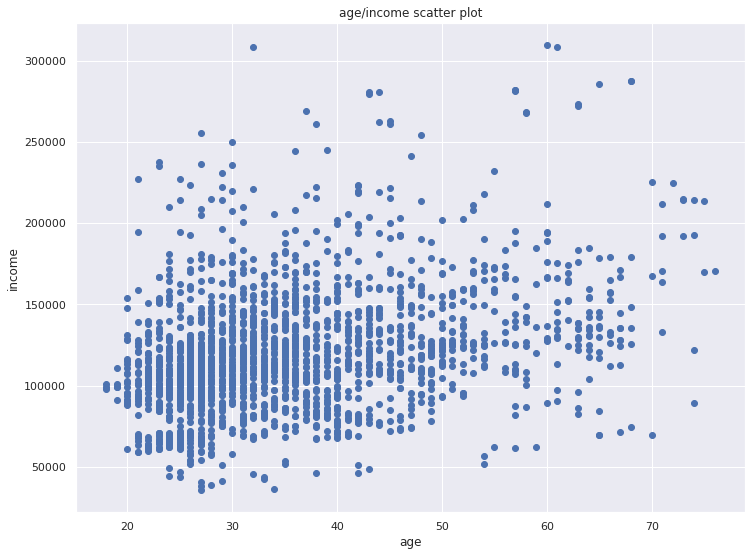

In [ ]:
plt.figure(figsize= (12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('age')
plt.ylabel('income')
plt.title('age/income scatter plot')
plt.show()

In [ ]:
scalar = StandardScaler()
segmentation_std = scalar.fit_transform(df_segmentation)

segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [ ]:
model = Birch(threshold=0.01, n_clusters=4)
model.fit(segmentation_std)

Birch(n_clusters=4, threshold=0.01)

In [ ]:
df_segmentation_birch = df_segmentation.copy()
df_segmentation_birch['Segment Birch'] = model.labels_

In [ ]:
df_segmentation_analysis = df_segmentation_birch.groupby(['Segment Birch']).mean()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment Birch,,,,,,,
0,0.684211,0.407895,34.935855,0.991776,91761.292763,0.108553,0.024671
1,0.000000,0.000000,36.813472,0.673575,137369.343696,1.176166,1.245250
2,0.497925,0.717842,54.593361,2.120332,163924.684647,1.257261,1.219917
3,0.660839,1.000000,28.155594,1.000000,117264.463287,0.998252,0.783217


In [ ]:
df_segmentation_analysis['N observation'] = df_segmentation_birch[['Segment Birch','Sex']].groupby(['Segment Birch']).count()
df_segmentation_analysis['proportation observation'] = df_segmentation_analysis['N observation'] / df_segmentation_analysis['N observation'].sum()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N observation,proportation observation
Segment Birch,,,,,,,,,
0,0.684211,0.407895,34.935855,0.991776,91761.292763,0.108553,0.024671,608,0.3040
1,0.000000,0.000000,36.813472,0.673575,137369.343696,1.176166,1.245250,579,0.2895
2,0.497925,0.717842,54.593361,2.120332,163924.684647,1.257261,1.219917,241,0.1205
3,0.660839,1.000000,28.155594,1.000000,117264.463287,0.998252,0.783217,572,0.2860


In [ ]:
df_segmentation_analysis.rename({
    0:'fewer-opportunities',
    1:'career focused',
    2:'well-off',
    3:'standard'

})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N observation,proportation observation
Segment Birch,,,,,,,,,
fewer-opportunities,0.684211,0.407895,34.935855,0.991776,91761.292763,0.108553,0.024671,608,0.3040
career focused,0.000000,0.000000,36.813472,0.673575,137369.343696,1.176166,1.245250,579,0.2895
well-off,0.497925,0.717842,54.593361,2.120332,163924.684647,1.257261,1.219917,241,0.1205
standard,0.660839,1.000000,28.155594,1.000000,117264.463287,0.998252,0.783217,572,0.2860


In [ ]:
df_segmentation_birch['Labels'] = df_segmentation_birch['Segment Birch'].map({
     0:'fewer-opportunities',
    1:'career focused',
    2:'well-off',
    3:'standard'
})
df_segmentation_birch

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment Birch,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,2,well-off
100000002,1,1,22,1,150773,1,2,3,standard
100000003,0,0,49,1,89210,0,0,0,fewer-opportunities
100000004,0,0,45,1,171565,1,1,1,career focused
100000005,0,0,53,1,149031,1,1,1,career focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,0,fewer-opportunities
100001997,1,1,27,1,117744,1,0,3,standard
100001998,0,0,31,0,86400,0,0,0,fewer-opportunities


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Segmentation using Birch')

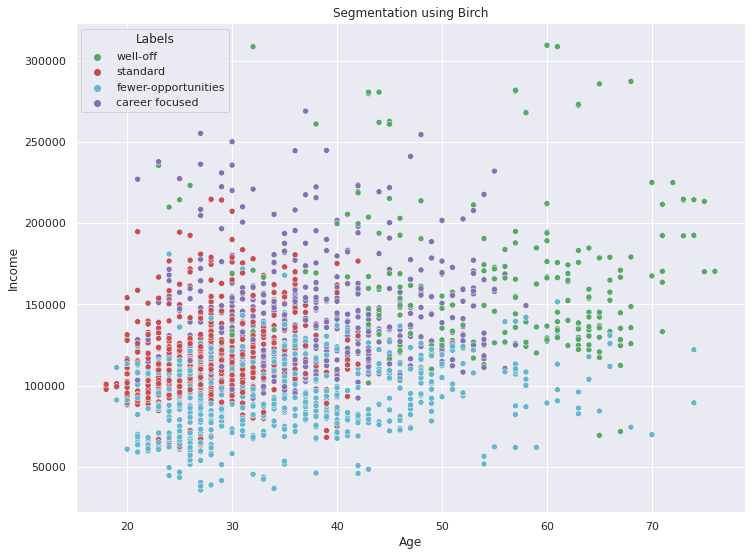

In [ ]:
x_axis = df_segmentation_birch['Age']
y_axis = df_segmentation_birch['Income']

plt.figure(figsize = (12,9))
sns.scatterplot(x_axis,y_axis, hue = df_segmentation_birch['Labels'], palette = ['g','r','c','m'])
plt.title('Segmentation using Birch')

In [ ]:
pca = PCA()
pca.fit(segmentation_std)

pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

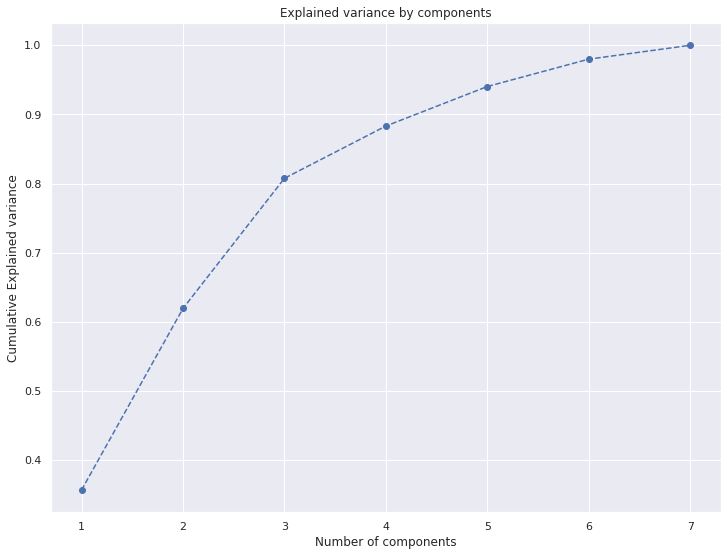

In [ ]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.show()

In [ ]:
pca = PCA(n_components= 3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1','Component 2','Component 3'])

df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x7ff743ebf550>,
 [Text(0, 0.5, 'Component 1'),
  Text(0, 1.5, 'Component 2'),
  Text(0, 2.5, 'Component 3')])

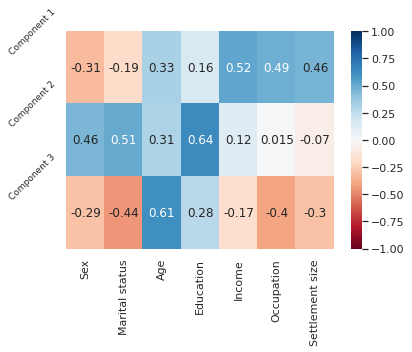

In [ ]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1, 
            annot = True,
            cmap = 'RdBu')
plt.yticks([0,1,2],
           ['Component 1','Component 2','Component 3'],
           rotation = 45,
           fontsize = 9)


In [ ]:
score_pca = pca.transform(segmentation_std) #pca score
score_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [ ]:
model = Birch(threshold=0.01, n_clusters=4)
model.fit(score_pca)

Birch(n_clusters=4, threshold=0.01)

In [ ]:
df_seg_pca_birch = pd.concat([df_segmentation.reset_index(drop = True),pd.DataFrame(score_pca)],axis = 1)
df_seg_pca_birch.columns.values[-3:] = ['Component 1','Component 2','Component 3']

df_seg_pca_birch['Segment Birch PCA'] = model.labels_
df_seg_pca_birch

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment Birch PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,3
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,3
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [ ]:
df_seg_pca_birch_freq = df_seg_pca_birch.groupby(['Segment Birch PCA']).mean()
df_seg_pca_birch_freq #career, education lifestyle, experience

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment Birch PCA,,,,,,,,,,
0,0.608475,0.484746,34.762712,0.994915,87720.649153,0.016949,0.010169,-1.620528,-0.013805,0.743257
1,0.000000,0.000000,36.791379,0.672414,137519.181034,1.174138,1.241379,1.203769,-1.276307,0.105413
2,0.500000,0.705882,54.953782,2.130252,163358.529412,1.252101,1.205882,1.899595,2.036024,0.654544
3,0.736486,0.910473,28.530405,1.000000,120799.324324,1.067568,0.785473,-0.328004,0.445657,-1.107166


In [ ]:
df_seg_pca_birch_freq['N observations'] = df_seg_pca_birch[['Segment Birch PCA','Sex']].groupby(['Segment Birch PCA']).count()
df_seg_pca_birch_freq['Proportion of Observations'] = df_seg_pca_birch_freq['N observations'] / df_seg_pca_birch_freq['N observations'].sum()

df_seg_pca_birch_freq = df_seg_pca_birch_freq.rename({
    0:'fewer-opportunities',
    1:'career focused',
    2:'well-off',
    3:'standard'
})

df_seg_pca_birch_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N observations,Proportion of Observations
Segment Birch PCA,,,,,,,,,,,,
fewer-opportunities,0.608475,0.484746,34.762712,0.994915,87720.649153,0.016949,0.010169,-1.620528,-0.013805,0.743257,590,0.295
career focused,0.000000,0.000000,36.791379,0.672414,137519.181034,1.174138,1.241379,1.203769,-1.276307,0.105413,580,0.290
well-off,0.500000,0.705882,54.953782,2.130252,163358.529412,1.252101,1.205882,1.899595,2.036024,0.654544,238,0.119
standard,0.736486,0.910473,28.530405,1.000000,120799.324324,1.067568,0.785473,-0.328004,0.445657,-1.107166,592,0.296


In [ ]:
df_seg_pca_birch['Legend'] = df_seg_pca_birch['Segment Birch PCA'].map({
    0:'fewer-opportunities',
    1:'career focused',
    2:'well-off',
    3:'standard'
})
df_seg_pca_birch

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment Birch PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,3,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0,fewer-opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0,fewer-opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,3,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0,fewer-opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,fewer-opportunities


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


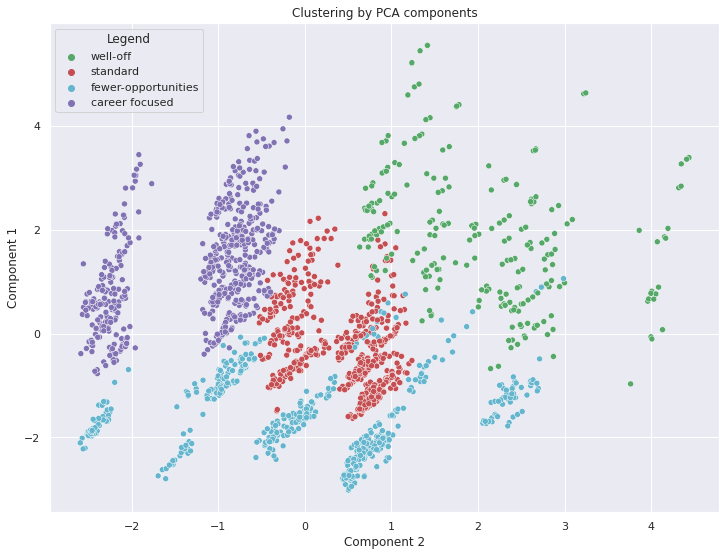

In [ ]:
#ploting  2 vs 1
x_axis = df_seg_pca_birch['Component 2']
y_axis = df_seg_pca_birch['Component 1']
plt.figure(figsize = (12,9))

sns.scatterplot(x_axis,y_axis, hue = df_seg_pca_birch['Legend'], palette = ['g','r','c','m'])
plt.title('Clustering by PCA components')
plt.show()